In [21]:
import glidertools as gt
#from cmocean import cm as cmo  # we use this for colormaps

#%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [23]:
import pygmt
import pandas as pd
import numpy as np

In [24]:
import netCDF4 as nc
from netCDF4 import num2date

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

Dataset Summary:
<xarray.Dataset> Size: 853MB
Dimensions:                (time: 5079692)
Coordinates:
  * time                   (time) datetime64[ns] 41MB 2023-09-23T01:24:41 ......
    latitude               (time) float64 41MB ...
    longitude              (time) float64 41MB ...
    depth                  (time) float64 41MB ...
Data variables: (12/17)
    heading                (time) float64 41MB ...
    pitch                  (time) float64 41MB ...
    roll                   (time) float64 41MB ...
    waypoint_latitude      (time) float64 41MB ...
    waypoint_longitude     (time) float64 41MB ...
    conductivity           (time) float64 41MB ...
    ...                     ...
    salinity               (time) float64 41MB ...
    potential_density      (time) float64 41MB ...
    density                (time) float64 41MB ...
    potential_temperature  (time) float64 41MB ...
    profile_index          (time) float64 41MB ...
    profile_direction      (time) float64 41MB 

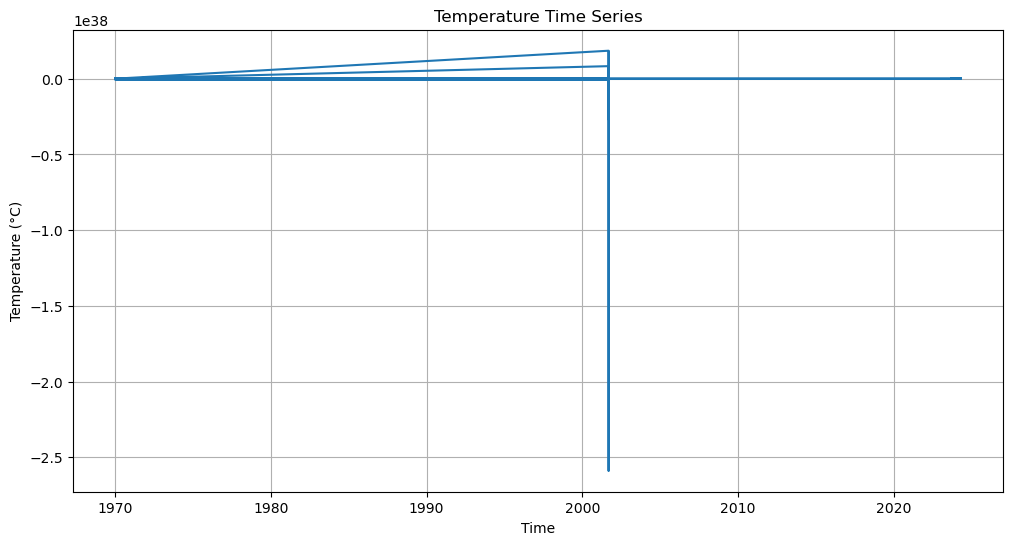

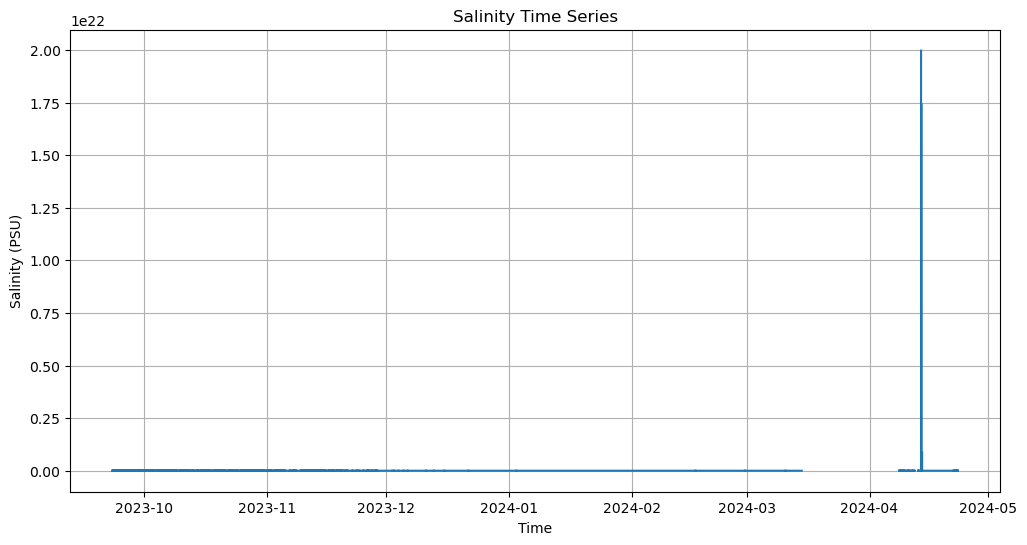

An error occurred: x and y must have same first dimension, but have shapes (1,) and (5079692,)


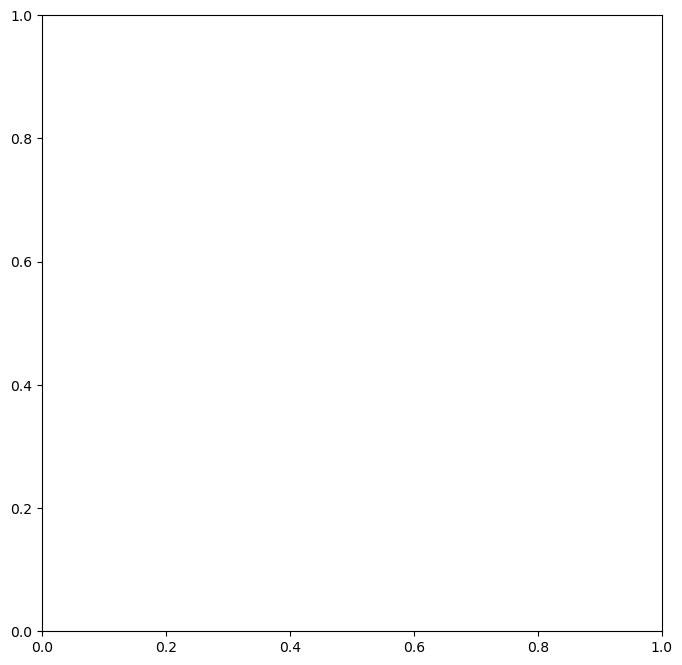

In [43]:
# Replace with the actual path to your Slocum glider data file (e.g., a NetCDF file)
#file_path = "E:\Gliders_Data\seaglider_data\seaglider\seaglider_2\sg615\SG615_SUMMER_2017_TWIN_G1\p6150063.nc"  # Example: "glider_data.nc"
file_path = "E:\\Gliders_Data\\original_glider_data\\glider_data\\all_glider_data\\process_1095\\L0-timeseries\\dfo-rosie713-20190615.nc"
try:
    # Open the NetCDF file using xarray
    ds = xr.open_dataset(file_path)

    # --- Basic Information ---
    print("Dataset Summary:")
    print(ds)

    print("\nVariables:")
    for var_name in ds.data_vars:
        print(f"- {var_name}: {ds[var_name].attrs.get('long_name', 'No long name')}")

    print("\nCoordinates:")
    for coord_name in ds.coords:
        print(f"- {coord_name}: {ds[coord_name].attrs.get('long_name', 'No long name')}")

    # --- Time Series Plots ---
    if 'time' in ds.coords:
        time = ds['time']

        # Example: Plot temperature over time
        if 'temperature' in ds.data_vars:
            plt.figure(figsize=(12, 6))
            plt.plot(time, ds['temperature'])
            plt.xlabel("Time")
            plt.ylabel("Temperature (°C)")
            plt.title("Temperature Time Series")
            plt.grid(True)
            plt.show()

        # Example: Plot depth over time
        if 'depth' in ds.data_vars:
            plt.figure(figsize=(12, 6))
            plt.plot(time, ds['depth'])
            plt.xlabel("Time")
            plt.ylabel("Depth (m)")
            plt.title("Depth Time Series")
            plt.grid(True)
            plt.gca().invert_yaxis() #Invert y axis so 0 is at the surface.
            plt.show()

        # Example: Plot salinity over time
        if 'salinity' in ds.data_vars:
            plt.figure(figsize=(12, 6))
            plt.plot(time, ds['salinity'])
            plt.xlabel("Time")
            plt.ylabel("Salinity (PSU)")
            plt.title("Salinity Time Series")
            plt.grid(True)
            plt.show()

    # --- Depth Profiles ---
    if 'depth' in ds.coords and 'time' in ds.coords:
        depth = ds['depth']
        time = ds['time']

        # Example: Plot temperature vs. depth for the first time step
        if 'temperature' in ds.data_vars:
            plt.figure(figsize=(8, 8))
            plt.plot(ds['temperature'].isel(time=0), depth)
            plt.xlabel("Temperature (°C)")
            plt.ylabel("Depth (m)")
            plt.title("Temperature Profile (First Time Step)")
            plt.grid(True)
            plt.gca().invert_yaxis()
            plt.show()

        # Example: Plot salinity vs. depth for the first time step
        if 'salinity' in ds.data_vars:
            plt.figure(figsize=(8, 8))
            plt.plot(ds['salinity'].isel(time=0), depth)
            plt.xlabel("Salinity (PSU)")
            plt.ylabel("Depth (m)")
            plt.title("Salinity Profile (First Time Step)")
            plt.grid(True)
            plt.gca().invert_yaxis()
            plt.show()

    # --- Scatter Plots ---
    if 'temperature' in ds.data_vars and 'salinity' in ds.data_vars:
        plt.figure(figsize=(8, 8))
        plt.scatter(ds['salinity'], ds['temperature'], s=5)
        plt.xlabel("Salinity (PSU)")
        plt.ylabel("Temperature (°C)")
        plt.title("Temperature vs. Salinity")
        plt.grid(True)
        plt.show()

    # --- Horizontal maps (if lat/lon are present) ---
    if 'latitude' in ds.coords and 'longitude' in ds.coords:
        latitude = ds['latitude']
        longitude = ds['longitude']

        if 'temperature' in ds.data_vars:
            plt.figure(figsize=(10, 8))
            plt.scatter(longitude, latitude, c=ds['temperature'].isel(time=0), s=10)
            plt.colorbar(label="Temperature (°C)")
            plt.xlabel("Longitude")
            plt.ylabel("Latitude")
            plt.title("Surface Temperature Map (First Time Step)")
            plt.grid(True)
            plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset Summary:
 <xarray.Dataset> Size: 853MB
Dimensions:                (time: 5079692)
Coordinates:
  * time                   (time) datetime64[ns] 41MB 2023-09-23T01:24:41 ......
    latitude               (time) float64 41MB ...
    longitude              (time) float64 41MB ...
    depth                  (time) float64 41MB ...
Data variables: (12/17)
    heading                (time) float64 41MB ...
    pitch                  (time) float64 41MB ...
    roll                   (time) float64 41MB ...
    waypoint_latitude      (time) float64 41MB ...
    waypoint_longitude     (time) float64 41MB ...
    conductivity           (time) float64 41MB ...
    ...                     ...
    salinity               (time) float64 41MB ...
    potential_density      (time) float64 41MB ...
    density                (time) float64 41MB ...
    potential_temperature  (time) float64 41MB ...
    profile_index          (time) float64 41MB ...
    profile_direction      (time) float64 41MB

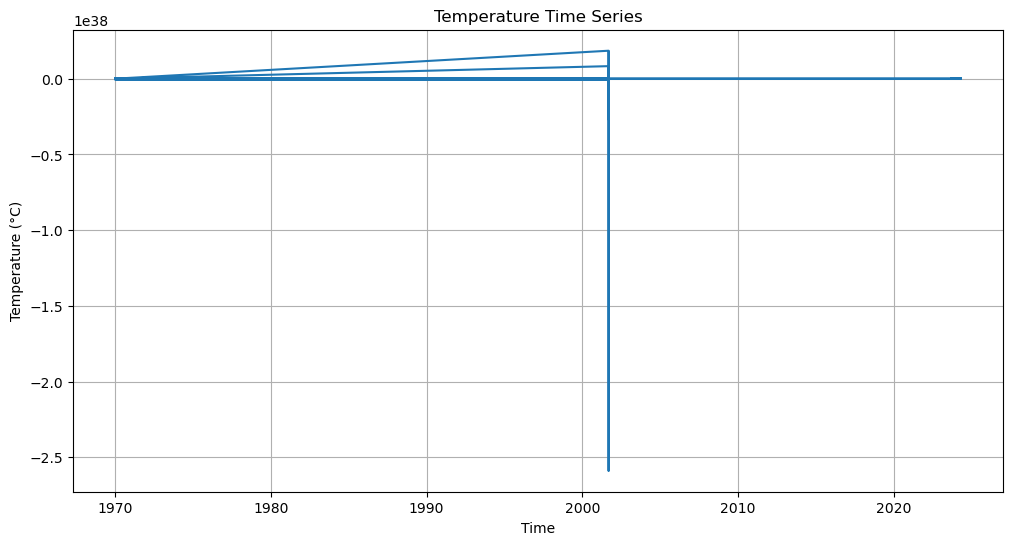

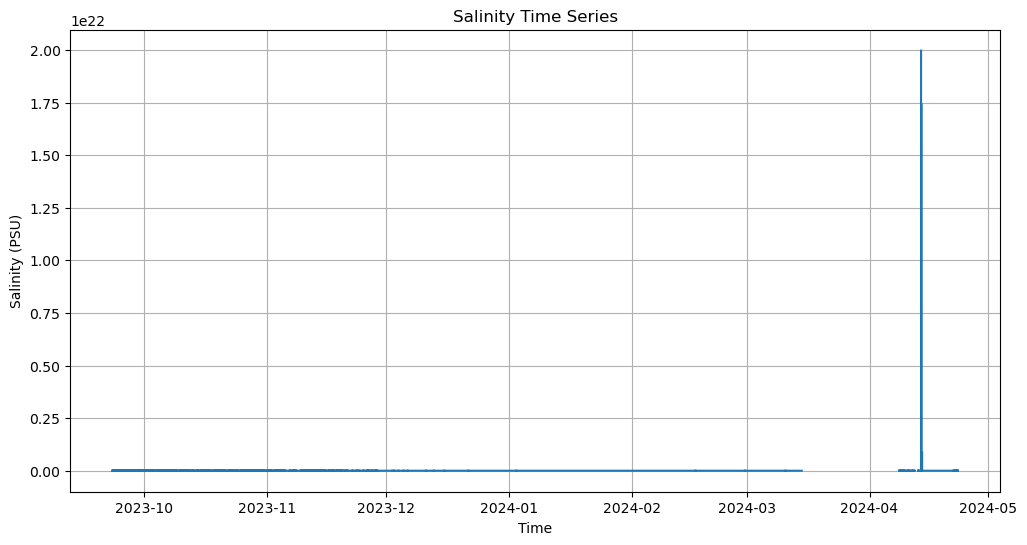

An error occurred: x and y must have same first dimension, but have shapes (1,) and (5079692,)


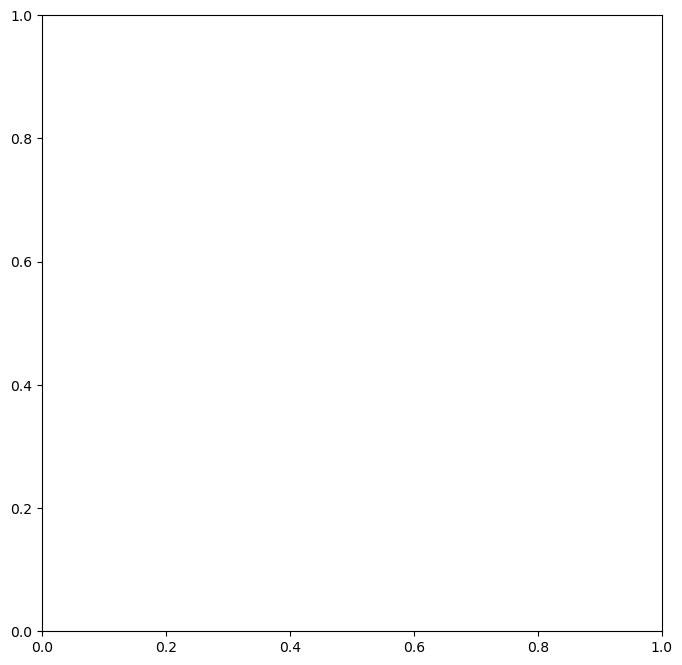

In [46]:
def analyze_glider_data(file_path):
    """
    Performs exploratory data analysis on a Slocum glider NetCDF file.
    
    Args:
        file_path (str): Path to the NetCDF file.
    """    
    try:
        with xr.open_dataset(file_path, engine = "netcdf4") as ds:
            print_dataset_info(ds)
            plot_time_series(ds)
            plot_depth_profiles(ds)
            plot_scatter_plots(ds)
            plot_horizontal_maps(ds)

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

def print_dataset_info(ds):
    """Prints dataset summary, variables, and coordinates."""
    print("Dataset Summary:\n", ds)
    print("\nVariables:")
    for var_name in ds.data_vars:
        print(f"- {var_name}: {ds[var_name].attrs.get('long_name', 'No long name')}")
    print("\nCoordinates:")
    for coord_name in ds.coords:
        print(f"- {coord_name}: {ds[coord_name].attrs.get('long_name', 'No long name')}")

def plot_time_series(ds):
    """Plots time series of temperature, depth, and salinity."""
    if 'time' in ds.coords:
        time = ds['time']
        if 'temperature' in ds.data_vars:
            plot_single_time_series(time, ds['temperature'], "Temperature (°C)", "Temperature Time Series")
        if 'depth' in ds.data_vars:
            plot_single_time_series(time, ds['depth'], "Depth (m)", "Depth Time Series", invert_y=True)
        if 'salinity' in ds.data_vars:
            plot_single_time_series(time, ds['salinity'], "Salinity (PSU)", "Salinity Time Series")

def plot_single_time_series(time, data, ylabel, title, invert_y=False):
    """Helper function to plot a single time series."""
    plt.figure(figsize=(12, 6))
    plt.plot(time, data)
    plt.xlabel("Time")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    if invert_y:
        plt.gca().invert_yaxis()
    plt.show()

def plot_depth_profiles(ds):
    """Plots temperature and salinity depth profiles."""
    if 'depth' in ds.coords and 'time' in ds.coords:
        depth = ds['depth']
        if 'temperature' in ds.data_vars:
            plot_single_depth_profile(depth, ds['temperature'].isel(time=0), "Temperature (°C)", "Temperature Profile (First Time Step)")
        if 'salinity' in ds.data_vars:
            plot_single_depth_profile(depth, ds['salinity'].isel(time=0), "Salinity (PSU)", "Salinity Profile (First Time Step)")

def plot_single_depth_profile(depth, data, xlabel, title):
    """Helper function to plot a single depth profile."""
    plt.figure(figsize=(8, 8))
    plt.plot(data, depth)
    plt.xlabel(xlabel)
    plt.ylabel("Depth (m)")
    plt.title(title)
    plt.grid(True)
    plt.gca().invert_yaxis()
    plt.show()

def plot_scatter_plots(ds):
    """Plots temperature vs. salinity scatter plot."""
    if 'temperature' in ds.data_vars and 'salinity' in ds.data_vars:
        plt.figure(figsize=(8, 8))
        plt.scatter(ds['salinity'], ds['temperature'], s=5)
        plt.xlabel("Salinity (PSU)")
        plt.ylabel("Temperature (°C)")
        plt.title("Temperature vs. Salinity")
        plt.grid(True)
        plt.show()

def plot_horizontal_maps(ds):
    """Plots horizontal maps of surface temperature."""
    if 'latitude' in ds.coords and 'longitude' in ds.coords:
        if 'temperature' in ds.data_vars:
            plt.figure(figsize=(10, 8))
            plt.scatter(ds['longitude'], ds['latitude'], c=ds['temperature'].isel(time=0), s=10)
            plt.colorbar(label="Temperature (°C)")
            plt.xlabel("Longitude")
            plt.ylabel("Latitude")
            plt.title("Surface Temperature Map (First Time Step)")
            plt.grid(True)
            plt.show()

# Example usage:
file_path = "E:\\Gliders_Data\\original_glider_data\\glider_data\\all_glider_data\\process_1095\\L0-timeseries\\dfo-rosie713-20190615.nc" # Replace with your file path.
analyze_glider_data(file_path)

In [54]:
def plot_scatter_plots(ds):
    """Plots temperature vs. salinity scatter plot."""
    if 'depth' in ds.data_vars and 'time' in ds.data_vars:
        plt.figure(figsize=(8, 8))
        plt.scatter(ds['time'], ds['depth'], s=5)
        plt.xlabel("Date & Time")
        plt.ylabel("Depth (°C)")
        plt.title("Depth vs. Time")
        plt.grid(True)
        plt.show()

plot_scatter_plots(ds)

In [56]:
ds.roll

<bound method Dataset.roll of <xarray.Dataset> Size: 853MB
Dimensions:                (time: 5079692)
Coordinates:
  * time                   (time) datetime64[ns] 41MB 2023-09-23T01:24:41 ......
    latitude               (time) float64 41MB ...
    longitude              (time) float64 41MB ...
    depth                  (time) float64 41MB -0.09944 -0.09944 ... -0.2387
Data variables: (12/17)
    heading                (time) float64 41MB ...
    pitch                  (time) float64 41MB ...
    roll                   (time) float64 41MB ...
    waypoint_latitude      (time) float64 41MB ...
    waypoint_longitude     (time) float64 41MB ...
    conductivity           (time) float64 41MB ...
    ...                     ...
    salinity               (time) float64 41MB nan nan nan nan ... nan nan nan
    potential_density      (time) float64 41MB ...
    density                (time) float64 41MB ...
    potential_temperature  (time) float64 41MB ...
    profile_index          (tim

In [58]:
ds.coords

Coordinates:
  * time       (time) datetime64[ns] 41MB 2023-09-23T01:24:41 ... 2024-06-12T...
    latitude   (time) float64 41MB ...
    longitude  (time) float64 41MB ...
    depth      (time) float64 41MB -0.09944 -0.09944 ... -0.2387 -0.2387

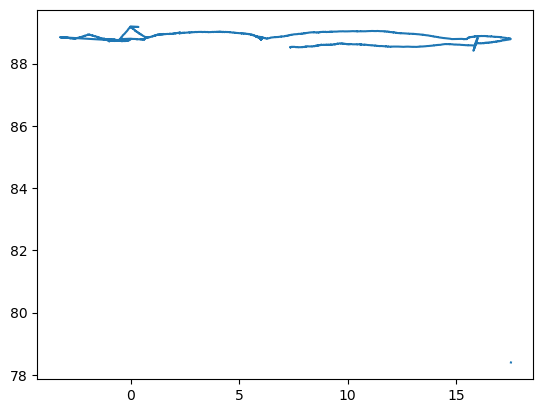

In [60]:
plt.plot(ds['latitude'], ds['longitude'])

In [ ]:
plt.plot(ds['latitude'], ds['longitude'])

In [73]:
ds.coords

Coordinates:
  * time       (time) datetime64[ns] 41MB 2023-09-23T01:24:41 ... 2024-06-12T...
    latitude   (time) float64 41MB nan 7.362 7.362 7.362 ... 17.53 17.53 17.53
    longitude  (time) float64 41MB nan 88.52 88.52 88.52 ... 78.4 78.4 78.4 78.4
    depth      (time) float64 41MB -0.09944 -0.09944 ... -0.2387 -0.2387

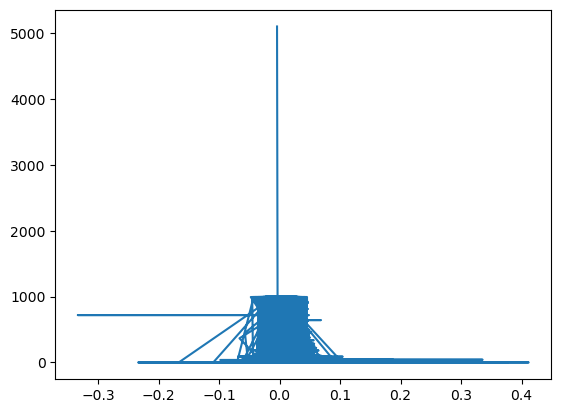

In [95]:
plt.plot(ds['roll'], ds['depth'])

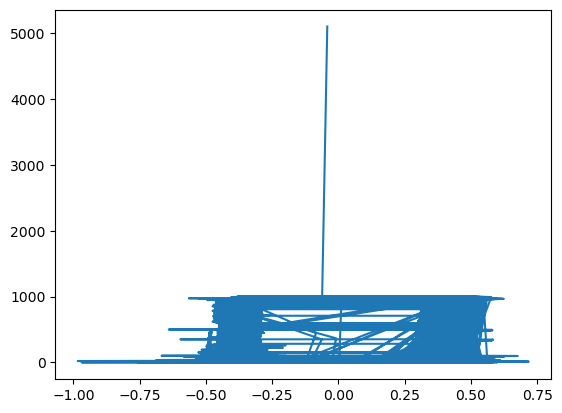

In [96]:
plt.plot(ds['pitch'], ds['depth'])

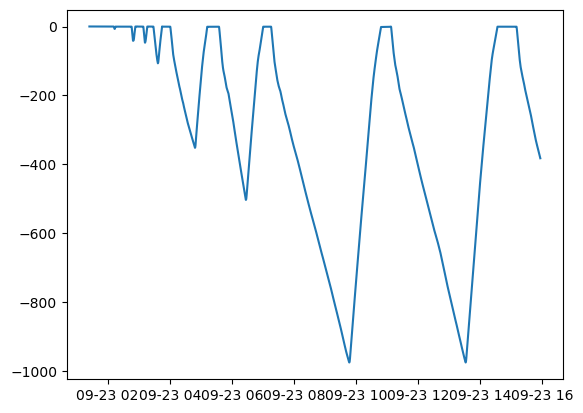

In [93]:
plt.plot(ds['time'].values[0:20000], ds['depth'].values[0:20000]*(-1))

In [110]:
df = nc.Dataset(file_path)

# print(df.dimensions)
print(df.variables)

{'time': <class 'netCDF4.Variable'>
int64 time(time)
    source: sci_m_present_time
    long_name: Time
    standard_name: time
    axis: T
    observation_type: measured
    units: seconds since 1970-01-01T00:00:00+00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (5079692,)
filling on, default _FillValue of -9223372036854775806 used, 'latitude': <class 'netCDF4.Variable'>
float64 latitude(time)
    _FillValue: nan
    source: m_lat
    long_name: latitude
    standard_name: latitude
    units: degrees_north
    axis: Y
    comment: Estimated between surface fixes
    observation_type: measured
    platform: platform
    reference: WGS84
    valid_max: 90.0
    valid_min: -90.0
    coordinate_reference_frame: urn:ogc:crs:EPSG::4326
    accuracy:  
    precision:  
    resolution:  
    ancillary_variables:  
unlimited dimensions: 
current shape = (5079692,)
filling on, 'longitude': <class 'netCDF4.Variable'>
float64 longitude(time)
    _FillValue: nan
    